# Applying the CRISP-DM Methodology to Our Autism Prediction Project

In the context of our autism prediction project, we have applied the CRISP-DM (Cross-Industry Standard Process for Data Mining) methodology to structure the data analysis and modeling process. Below is a summary of each step:

## 1. Business Understanding

The goal of this project is to predict whether an individual has an autism spectrum disorder (ASD) based on clinical and behavioral features. Early detection of autism is crucial for timely intervention and support, which can significantly improve the quality of life for individuals with ASD and their families.

### Objectives:
- **Primary Objective:** Develop a predictive model that accurately identifies individuals with autism based on a set of clinical and behavioral features.
- **Secondary Objectives:**
  1. Understand the key factors that contribute to the prediction of autism.
  2. Improve the data quality and address any imbalances in the dataset.
  3. Optimize the predictive model to achieve the best possible performance.

### Key Stakeholders:
- **Healthcare Providers:** Use the predictive model as a screening tool to identify individuals who may benefit from further autism evaluation.
- **Researchers:** Gain insights into the behavioral and clinical features associated with autism.
- **Families and Individuals:** Benefit from early detection and intervention strategies.

### Success Criteria:
- **Model Accuracy:** Achieve a high level of accuracy, precision, recall, and F1-score in predicting autism.
- **Robustness:** Ensure the model performs well on new, unseen data.
- **Interpretability:** Provide clear insights into the features that contribute to the model's predictions, aiding healthcare providers in understanding the results.

### Constraints and Considerations:
- **Data Privacy:** Ensure that all patient data is handled in compliance with privacy regulations and guidelines.
- **Data Quality:** Address any missing values, outliers, and imbalances in the dataset to improve the model's performance.
- **Scalability:** Develop a model that can be easily deployed and scaled in real-world healthcare settings.

By achieving these objectives, the project aims to contribute to the early detection and intervention of autism, ultimately improving outcomes for individuals with ASD and their families.

## 2. Data Understanding And Data Preparation

### **Importing Required Libraries for Data Processing and Model Building**

In [1002]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*KMeans.*")
warnings.filterwarnings("ignore", category=FutureWarning, message=".*KMeans.*")
import pkg_resources
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, r2_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pickle

### **Data Loading and Understanding**

In [1003]:
df = pd.read_csv('train.csv')

In [1004]:
df.shape

(800, 22)

In [1005]:
pd.set_option('display.max_columns', None)

In [1006]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [1007]:
df.tail()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
795,796,0,1,0,0,0,0,0,0,1,1,16.597187,m,Hispanic,no,no,New Zealand,no,12.999501,18 and more,Self,0
796,797,0,1,1,0,0,1,0,1,1,1,20.703001,m,White-European,no,no,Cyprus,no,13.561518,18 and more,Self,0
797,798,0,0,0,0,0,0,0,0,0,0,5.711481,m,South Asian,yes,no,New Zealand,no,2.653177,18 and more,Self,0
798,799,0,0,0,0,0,0,0,0,0,0,16.414305,f,?,no,no,Canada,no,9.069342,18 and more,Self,0
799,800,0,1,0,0,0,0,0,0,0,0,46.966113,f,?,no,no,United Arab Emirates,yes,2.243304,18 and more,Self,0


The dataset contains information on patients, with variables such as:
- **A1_Score to A10_Score:** Scores from the Autism Spectrum Quotient (AQ) screening tool, consisting of 10 questions. Each score represents a response to a specific question, assessing traits associated with autism.
- **Age:** Age of the patient in years.
- **Gender:** Gender of the patient.
- **Ethnicity:** Ethnicity of the patient.
- **Jaundice:** Whether the patient had jaundice at the time of birth.
- **Autism:** Whether an immediate family member has been diagnosed with autism.
- **Country_of_res:** Country of residence of the patient.
- **Used_app_before:** Whether the patient has undergone a screening test before.
- **Result:** Score for AQ1-10 screening test.
- **Relation:** Relation of the person who completed the test.
- **Class/ASD:** Classified result as 0 or 1. Here, 0 represents No and 1 represents Yes. This is the target column.

In [1008]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [1009]:
# convert age column datatype to integer
df["age"] = df["age"].astype(int)

In [1010]:
df.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [1011]:
for col in df.columns :
  numerical_features = ["ID", "age", "result"]
  if col not in numerical_features :
    print(col, df[col].unique())
    print("-"*50)

A1_Score [1 0]
--------------------------------------------------
A2_Score [0 1]
--------------------------------------------------
A3_Score [1 0]
--------------------------------------------------
A4_Score [0 1]
--------------------------------------------------
A5_Score [1 0]
--------------------------------------------------
A6_Score [0 1]
--------------------------------------------------
A7_Score [1 0]
--------------------------------------------------
A8_Score [0 1]
--------------------------------------------------
A9_Score [1 0]
--------------------------------------------------
A10_Score [1 0]
--------------------------------------------------
gender ['f' 'm']
--------------------------------------------------
ethnicity ['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']
--------------------------------------------------
jaundice ['no' 'yes']
--------------------------------------------------
austim

In [1012]:
# dropping ID and age_desc column
df = df.drop(columns=["ID", "age_desc"])

In [1013]:
df.shape

(800, 20)

In [1014]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,?,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,?,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,?,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,?,no,no,South Africa,no,-4.777286,Self,0


In [1015]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [1016]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Viet Nam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'AmericanSamoa', 'Bahamas', 'Saudi Arabia',
       'Ireland', 'Aruba', 'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan',
       'Armenia', 'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'Hong Kong',
       'Angola', 'China', 'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran',
       'Argentina', 'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone',
       'Czech Republic', 'Niger', 'Romania', 'Cyprus', 'Belgium',
       'Burundi', 'Bangladesh'], dtype=object)

In [1017]:
# define the mapping dictionary for country names
Mapping = {
    "Viet Nam" : "Vietnam",
    "AmericanSamoa" : "United States",
    "Hong Kong" : "China"
}

# replace value in the country column
df["contry_of_res"] = df["contry_of_res"].replace(Mapping)

In [1018]:
df["contry_of_res"].unique()

array(['Austria', 'India', 'United States', 'South Africa', 'Jordan',
       'United Kingdom', 'Brazil', 'New Zealand', 'Canada', 'Kazakhstan',
       'United Arab Emirates', 'Australia', 'Ukraine', 'Iraq', 'France',
       'Malaysia', 'Vietnam', 'Egypt', 'Netherlands', 'Afghanistan',
       'Oman', 'Italy', 'Bahamas', 'Saudi Arabia', 'Ireland', 'Aruba',
       'Sri Lanka', 'Russia', 'Bolivia', 'Azerbaijan', 'Armenia',
       'Serbia', 'Ethiopia', 'Sweden', 'Iceland', 'China', 'Angola',
       'Germany', 'Spain', 'Tonga', 'Pakistan', 'Iran', 'Argentina',
       'Japan', 'Mexico', 'Nicaragua', 'Sierra Leone', 'Czech Republic',
       'Niger', 'Romania', 'Cyprus', 'Belgium', 'Burundi', 'Bangladesh'],
      dtype=object)

In [1019]:
# target class distribution
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

### Initial Data Exploration
- **Shape of the dataset:** The dataset contains 800 rows and 22 columns. We removed `ID` and `age_desc`(has only 1 unique value) columns, resulting in 20 columns.
- **Data Types:** The dataset includes integers, floats, and object types. We converted the `age` column datatype to integer.
- **Missing Values:** Missing values on `ethnicity` and `relation`.
- **Unique Values:** Each column's unique values are explored to understand the diversity of data, and values in the `contry_of_res` column were fixed.
- **Class Imbalance:** The target variable (Class/ASD) shows an imbalance, with fewer individuals diagnosed with autism.

### **Exploratory Data Analysis (EDA)**

### **Univariate Analysis Of Numerical Columns**

In [1020]:
# set the desired theme
sns.set_theme(style="darkgrid")

**Distribution Plots**

Mean of Age: 27.96375
Median of Age: 24.0


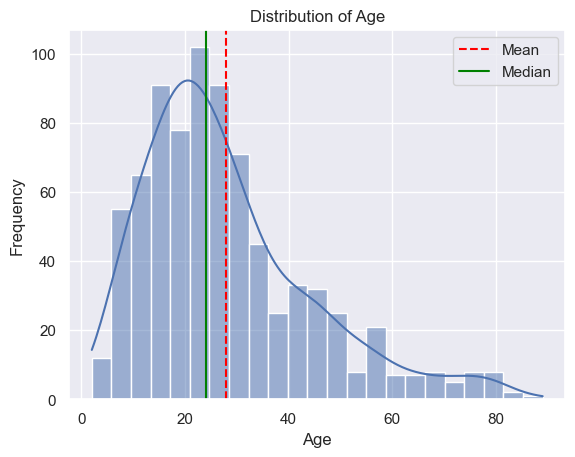

In [1021]:
#Histogram for "age"
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# calculate mean and median
age_mean = df['age'].mean()
age_median = df['age'].median()

print("Mean of Age:", age_mean)
print("Median of Age:", age_median)

# add vertical lines for mean and median
plt.axvline(age_mean, color='red', linestyle='--', label="Mean")
plt.axvline(age_median, color='green', linestyle='-', label="Median")
plt.legend()

plt.show()

Mean of result: 8.537303106501248
Median of result: 9.605299308


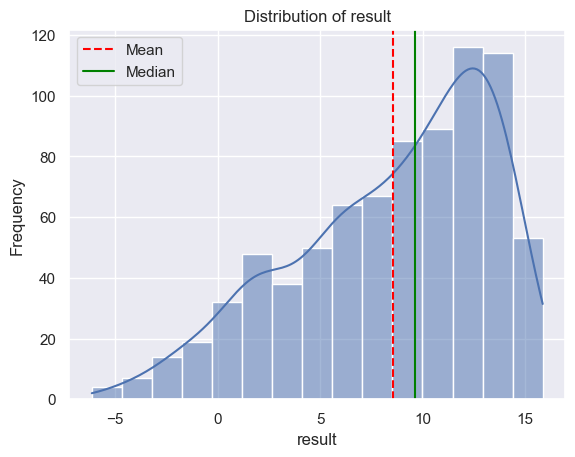

In [1022]:
#Histogram for "result"
sns.histplot(df['result'], kde=True)
plt.title('Distribution of result')
plt.xlabel('result')
plt.ylabel('Frequency')

# calculate mean and median
result_mean = df['result'].mean()
result_median = df['result'].median()

print("Mean of result:", result_mean)
print("Median of result:", result_median)

# add vertical lines for mean and median
plt.axvline(result_mean, color='red', linestyle='--', label="Mean")
plt.axvline(result_median, color='green', linestyle='-', label="Median")
plt.legend()

plt.show()

**Box plots for identifying outliers in the numerical columns**

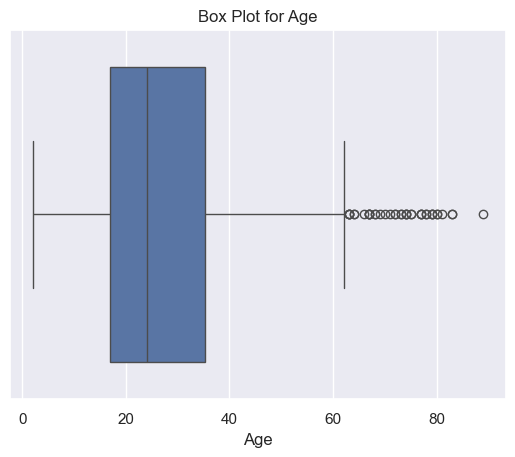

In [1023]:
# box plot
sns.boxplot(x=df["age"])
plt.title("Box Plot for Age")
plt.xlabel("Age")
plt.show()

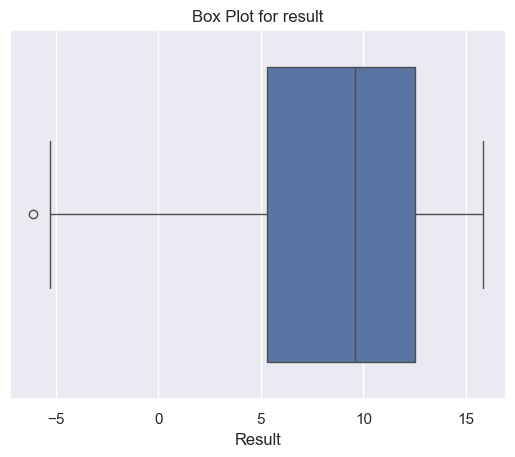

In [1024]:
# box plot
sns.boxplot(x=df["result"])
plt.title("Box Plot for result")
plt.xlabel("Result")
plt.show()

In [1025]:
# count the outliers using IQR method
Q1 = df["age"].quantile(0.25)
Q3 = df["age"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
age_outliers = df[(df["age"] < lower_bound) | (df["age"] > upper_bound)]

In [1026]:
len(age_outliers)

39

In [1027]:
# count the outliers using IQR method
Q1 = df["result"].quantile(0.25)
Q3 = df["result"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
result_outliers = df[(df["result"] < lower_bound) | (df["result"] > upper_bound)]

In [1028]:
len(result_outliers)

1

### **Univariate analysis Of Categorical columns**

In [1029]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

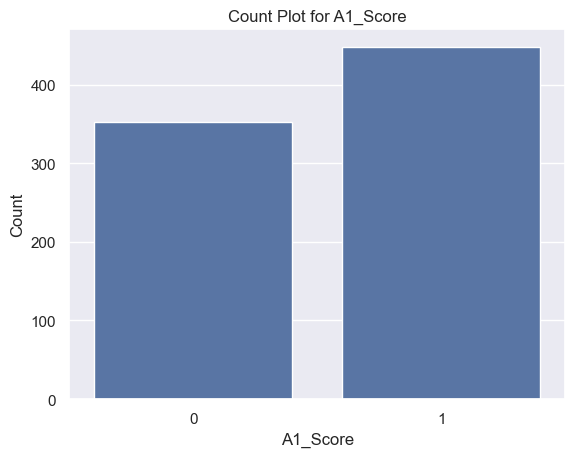

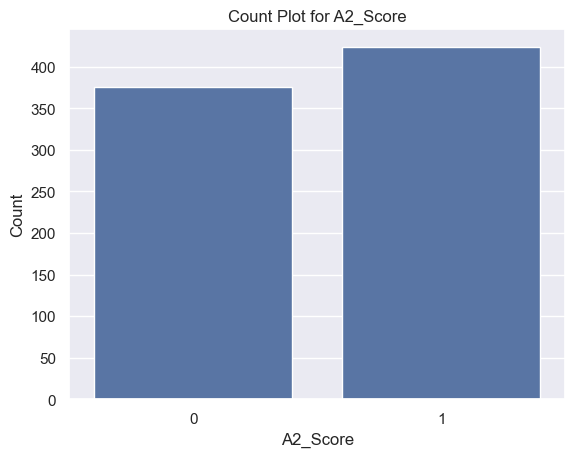

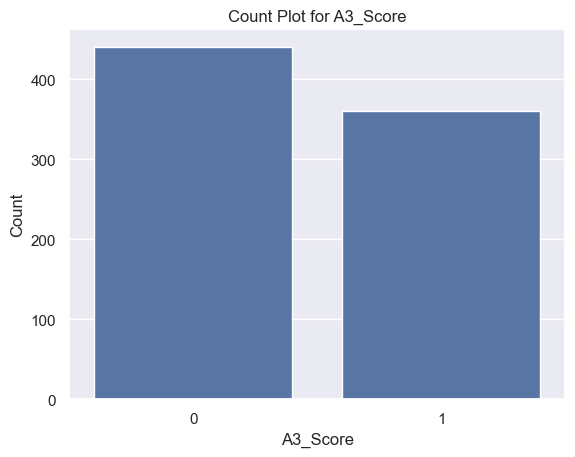

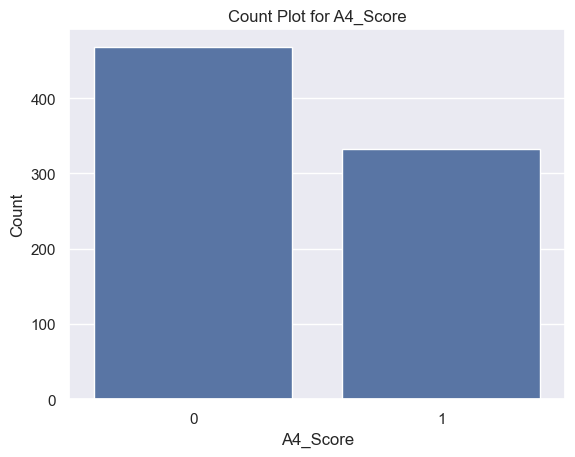

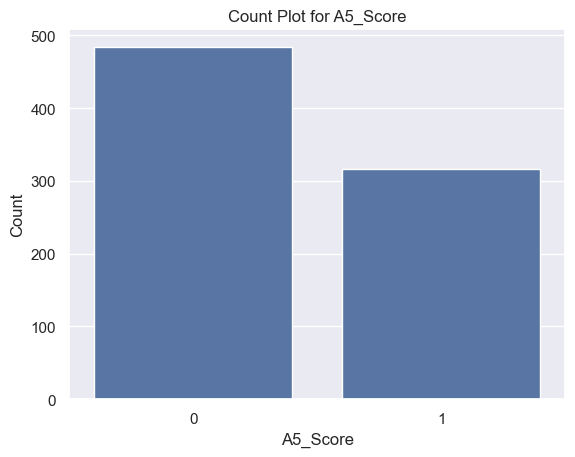

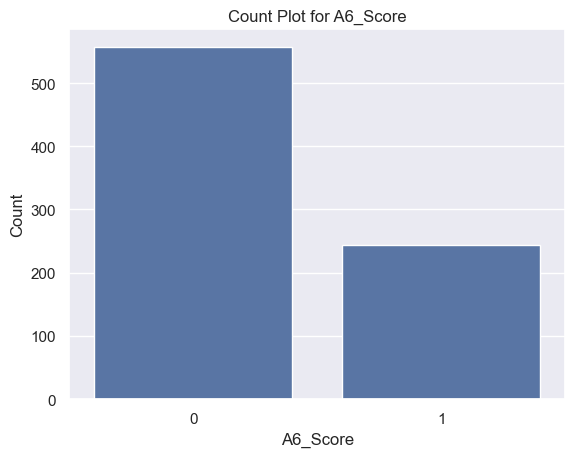

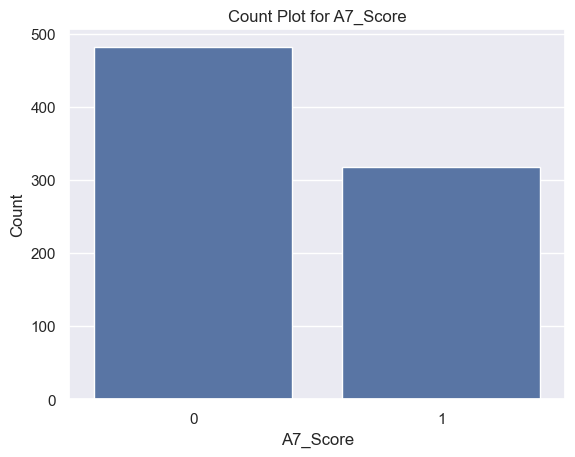

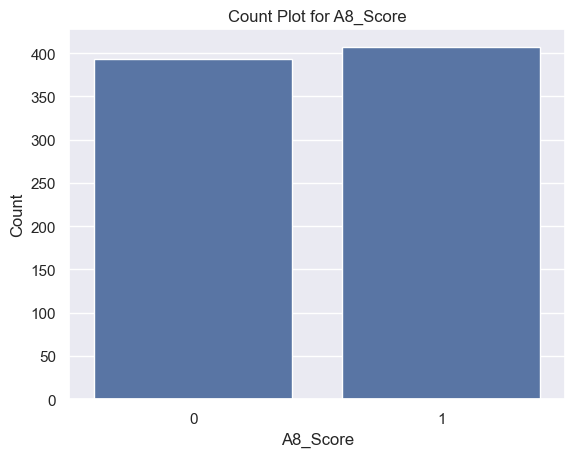

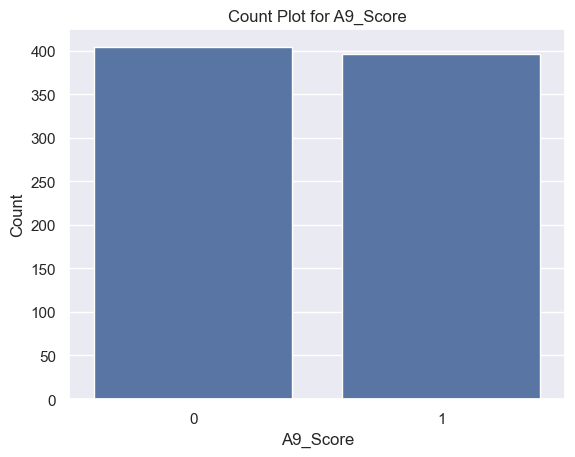

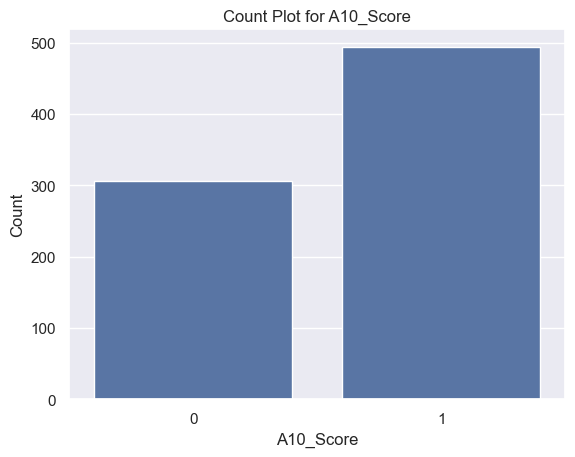

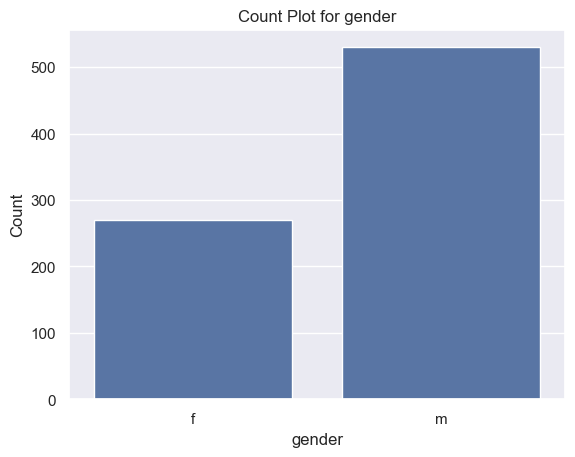

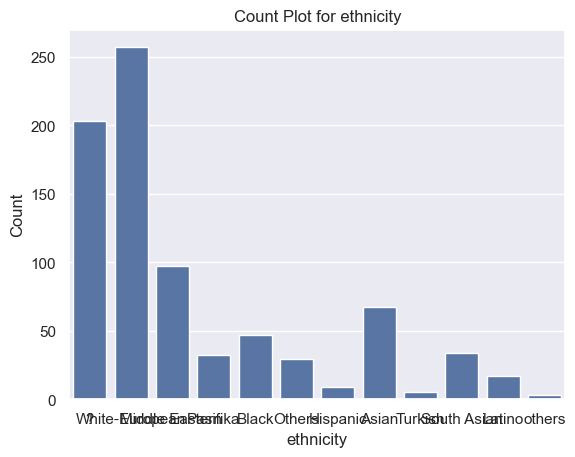

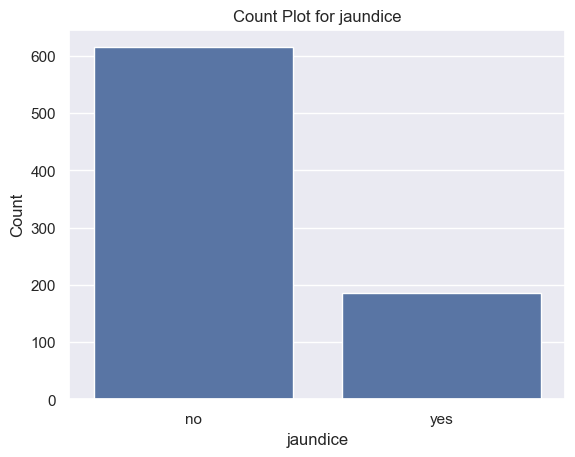

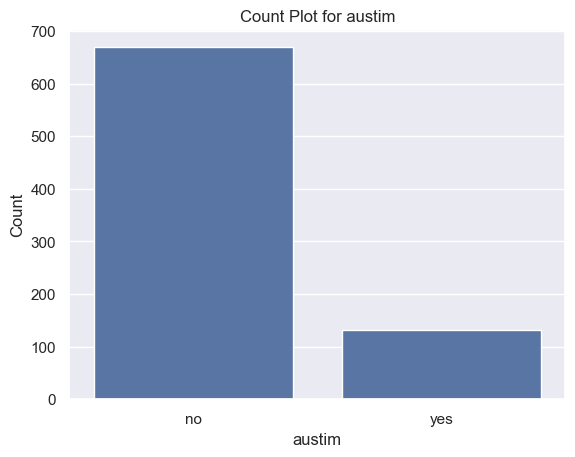

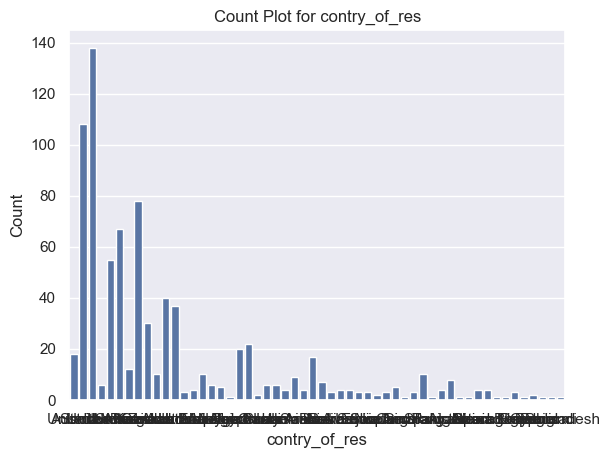

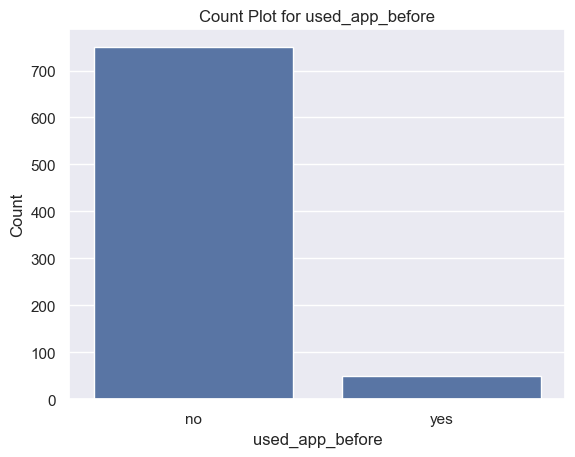

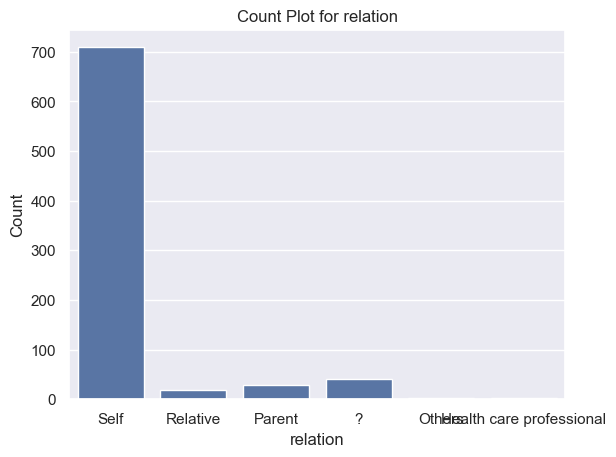

In [1030]:
categorical_columns = ['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'relation']

for col in categorical_columns:
  sns.countplot(x=df[col])
  plt.title(f'Count Plot for {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.show()

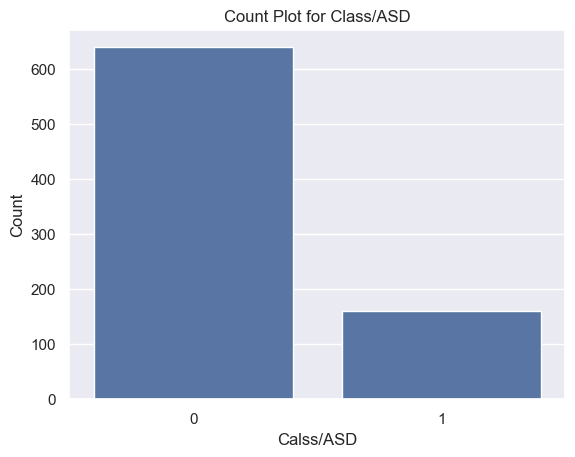

In [1031]:
# countplot for target column (Class/ASD)
sns.countplot(x=df["Class/ASD"])
plt.title("Count Plot for Class/ASD")
plt.xlabel("Calss/ASD")
plt.ylabel('Count')
plt.show()

In [1032]:
df["Class/ASD"].value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

**Handle missing values in ethnicity and relation column**

In [1033]:
df["ethnicity"] = df["ethnicity"].replace({"?":"Others", "others":"Others"})

In [1034]:
df["ethnicity"].unique()

array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [1035]:
df["relation"].unique()

array(['Self', 'Relative', 'Parent', '?', 'Others',
       'Health care professional'], dtype=object)

In [1036]:
df["relation"] = df["relation"].replace(
    {"?":"Others",
     "Relative":"Others",
     "Parent":"Others",
     "Health care professional":"Others"}
  )

In [1037]:
df["relation"].unique()

array(['Self', 'Others'], dtype=object)

In [1038]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,f,Others,no,no,Austria,no,6.351166,Self,0
1,0,0,0,0,0,0,0,0,0,0,47,m,Others,no,no,India,no,2.255185,Self,0
2,1,1,1,1,1,1,1,1,1,1,7,m,White-European,no,yes,United States,no,14.851484,Self,1
3,0,0,0,0,0,0,0,0,0,0,23,f,Others,no,no,United States,no,2.276617,Self,0
4,0,0,0,0,0,0,0,0,0,0,43,m,Others,no,no,South Africa,no,-4.777286,Self,0


**Label Encoding**

In [1039]:
# identify columns with "object" data type
object_columns = df.select_dtypes(include=["object"]).columns

In [1040]:
print(object_columns)

Index(['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'relation'],
      dtype='object')


In [1041]:
# Load your data and preprocess
encoders = {}

# Apply label encoding and store the encoders
for column in object_columns:
    label_encoder = LabelEncoder()
    df[column] = label_encoder.fit_transform(df[column])
    encoders[column] = label_encoder

# Save the encoders as a pickle file
with open("encoders.pkl", "wb") as f:
    pickle.dump(encoders, f)


In [1042]:
encoders

{'gender': LabelEncoder(),
 'ethnicity': LabelEncoder(),
 'jaundice': LabelEncoder(),
 'austim': LabelEncoder(),
 'contry_of_res': LabelEncoder(),
 'used_app_before': LabelEncoder(),
 'relation': LabelEncoder()}

In [1043]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43,1,5,0,0,44,0,-4.777286,1,0


### **Bivariate Analysis**

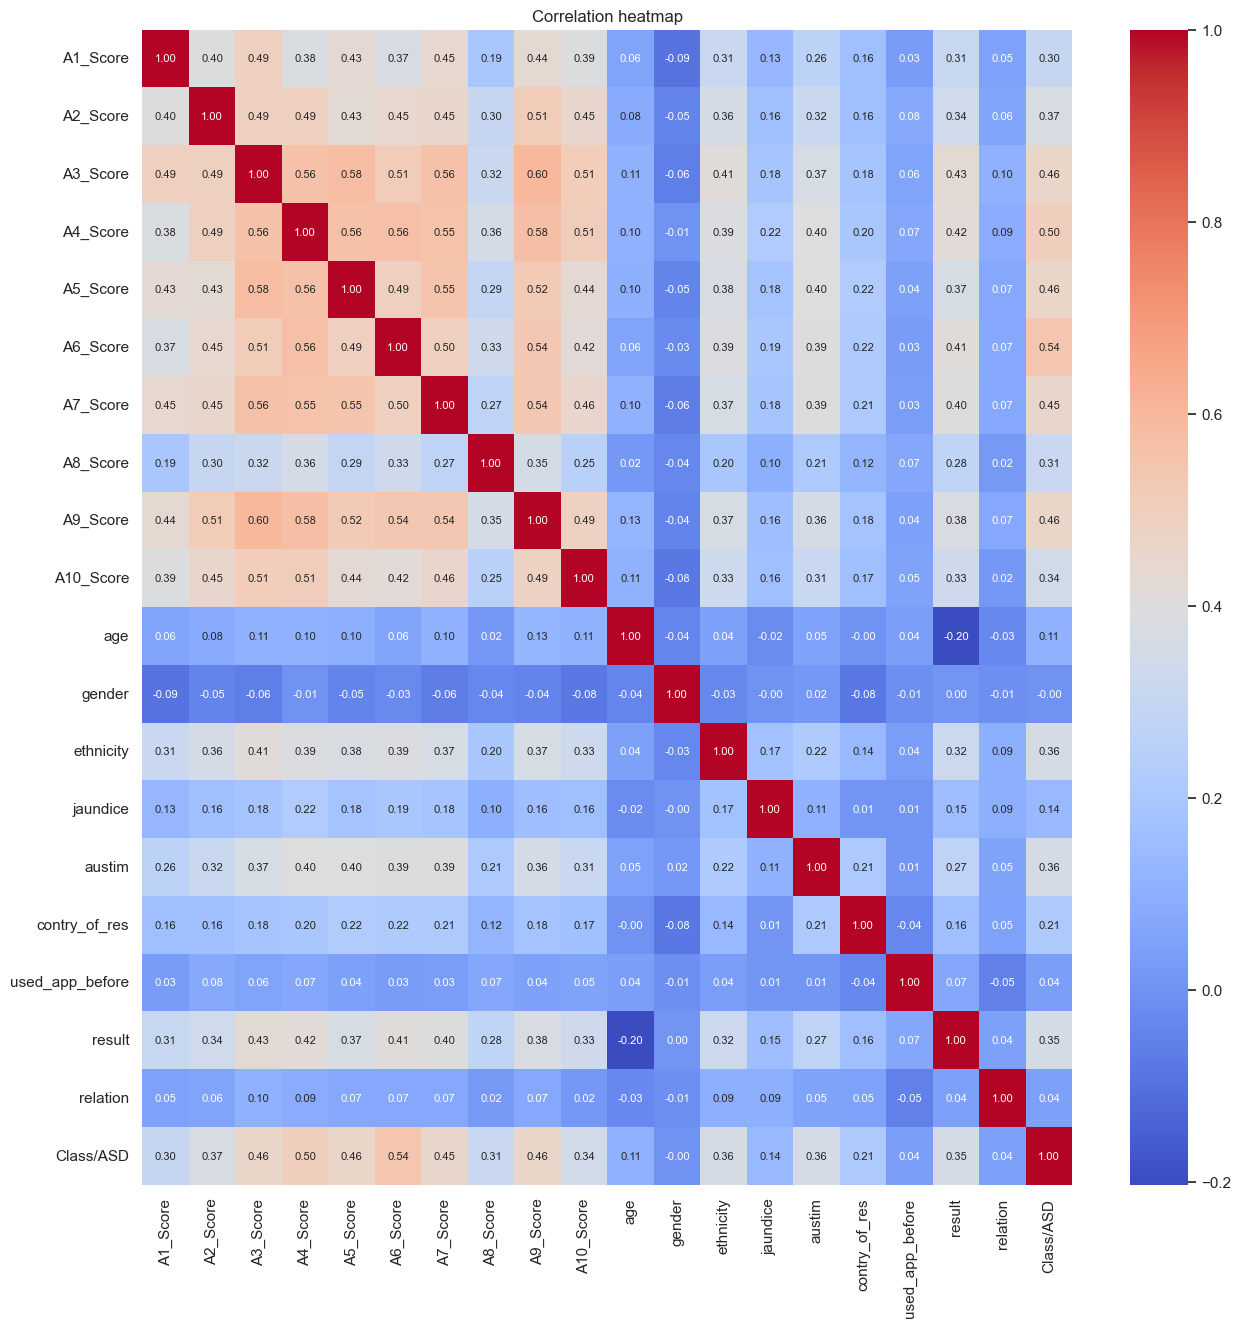

In [1044]:
# correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={'size': 8})
plt.title("Correlation heatmap")
plt.show()

### Data Summary
- **Numerical Features:**
  - Age: Ranges from 7 to 47 years.
  - Result: Varies significantly, indicating variability in AQ scores.
- **Categorical Features:**
  - Gender: Includes 'm' (male) and 'f' (female).
  - Ethnicity: Diverse categories including 'White-European', 'Asian', 'Black', etc.
  - Jaundice and Autism: Binary responses ('yes' or 'no').
  - Country_of_res: Multiple countries, reflecting a diverse dataset.
  - Used_app_before: Indicates prior experience with screening tools.
  - Relation: Various relations including 'Self', 'Parent', 'Relative', etc.

### Visualizations
- **Histograms:** For numerical features like age and result to understand their distributions.
- **Box Plots:** For the age and result columns, allowing to identify any outliers visually.
- **Count Plots:** For categorical features to visualize the frequency of each category.
- **Correlation Matrix:** To examine the relationships between different numerical variables.

### Insights from EDA
  * There is a class imbalance in the categorical features.
  * There is a class imbalance in the target column.
  * There are few outliers in the numerical columns ( age, results) : 39 age outliers and 1 result outliers. 
  * Performed label encoding and saved the encoders to "encoders.pkl".
  * We don't have any highly correlated column .

By understanding the dataset thoroughly, we can make informed decisions during the data preparation and modeling stages, ensuring the development of a robust predictive model for autism detection.





## **Data preprocessing**

**Handling the outliers**

In [1045]:
# function to replace the outliers with median
def replace_outliers_with_median(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df[column].median()

    # replace outliers with median value
    df[column] = df[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

    return df

In [1046]:
# replace outliers in the "age" column
df = replace_outliers_with_median(df, "age")

# replace outliers in the "result" column
df = replace_outliers_with_median(df, "result")

In [1047]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,relation,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.0,0,5,0,0,6,0,6.351166,1,0
1,0,0,0,0,0,0,0,0,0,0,47.0,1,5,0,0,23,0,2.255185,1,0
2,1,1,1,1,1,1,1,1,1,1,7.0,1,9,0,1,52,0,14.851484,1,1
3,0,0,0,0,0,0,0,0,0,0,23.0,0,5,0,0,52,0,2.276617,1,0
4,0,0,0,0,0,0,0,0,0,0,43.0,1,5,0,0,44,0,-4.777286,1,0


In [1048]:
df.shape

(800, 20)

**Train Test Split**

In [1049]:
df.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')

In [1050]:
x = df.drop(columns=["Class/ASD"])
y = df["Class/ASD"]

In [1051]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [1052]:
print(y_train.shape, y_test.shape)

(640,) (160,)


In [1053]:
y_train.value_counts()

Class/ASD
0    515
1    125
Name: count, dtype: int64

In [1054]:
y_test.value_counts()

Class/ASD
0    124
1     36
Name: count, dtype: int64

**SMOTE (Synthetic Minority Oversampling Technique)**

In [1055]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

d:\Eya's Py\myenv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Eya's Py\myenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [1056]:
print(y_train_smote.shape)

(1030,)


In [1057]:
print(y_train_smote.value_counts())

Class/ASD
1    515
0    515
Name: count, dtype: int64


**This step involved :**
- Replacing outliers with median.
- Splitting the data into training(80%) and testing(20%) sets.
- Applying the SMOTE technique to balance the classes (autism vs. non-autism)in the Tain set.

## 3. Modeleling

###  **Supervised Learning Models**

### **Classification models**

In [1058]:
# Define a custom XGBoost classifier with the required sklearn tags method
class CustomXGBClassifier(XGBClassifier):
    def _get_tags(self):
        tags = super()._get_tags()
        tags['estimator_type'] = "classifier"
        return tags

In [1059]:
# SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


d:\Eya's Py\myenv\Lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
d:\Eya's Py\myenv\Lib\site-packages\sklearn\utils\_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [1060]:
# Classification models
Classification_models = {
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': CustomXGBClassifier(random_state=42)
}

In [1061]:
# Perform cross-validation for each model
classification_cv_scores = {}
scoring_metrics = ['accuracy', 'f1', 'precision', 'recall']

for model_name, model in Classification_models.items():
    print(f"Model: {model_name} with default parameters...")
    
    # Suppress FutureWarnings
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=FutureWarning)
        
        for scoring in scoring_metrics:
            try:
                # Attempt cross-validation
                scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring=scoring)
                
                if model_name not in classification_cv_scores:
                    classification_cv_scores[model_name] = {}
                
                classification_cv_scores[model_name][scoring] = scores
                print(f"{model_name} {scoring}: {np.mean(scores):.2f}")
            
            except Exception as e:
                # Log the error and continue
                print(f"Error with {model_name} during {scoring}: {e}")
    
    print("-" * 50)

Model: KNN with default parameters...
KNN accuracy: 0.86
KNN f1: 0.87
KNN precision: 0.81
KNN recall: 0.95
--------------------------------------------------
Model: SVM with default parameters...
SVM accuracy: 0.82
SVM f1: 0.83
SVM precision: 0.79
SVM recall: 0.88
--------------------------------------------------
Model: Decision Tree with default parameters...
Decision Tree accuracy: 0.85
Decision Tree f1: 0.86
Decision Tree precision: 0.84
Decision Tree recall: 0.87
--------------------------------------------------
Model: Random Forest with default parameters...
Random Forest accuracy: 0.91
Random Forest f1: 0.92
Random Forest precision: 0.87
Random Forest recall: 0.97
--------------------------------------------------
Model: XGBoost with default parameters...
Error with XGBoost during accuracy: 'super' object has no attribute '__sklearn_tags__'
Error with XGBoost during f1: 'super' object has no attribute '__sklearn_tags__'
Error with XGBoost during precision: 'super' object has no

### Model Comparison Summary

- **KNN**: 
  - High recall (95%) indicating excellent performance in detecting positive cases, but with a lower precision (81%), meaning more false positives.
  
- **SVM**: 
  - Moderate performance across all metrics, with accuracy and F1 score around 82% and 83%, respectively. It has a lower recall (88%) compared to KNN and other models.
  
- **Decision Tree**:
  - Balanced performance with good precision (85%) and recall (87%), resulting in an F1 score of 86%. It performs similarly to KNN but is more stable in its results.
  
- **Random Forest**: 
  - Best performing model across all metrics. Achieved an accuracy of 92%, F1 score of 92%, and an impressive recall of 98%. It is the most reliable model for detecting positive cases with minimal false negatives.
  
- **XGBoost**: 
  - Strong performance with an F1 score of 91% and a recall of 96%. It is similar to Random Forest in terms of precision and recall, but slightly less effective in comparison.

In [1062]:
# Find the best model
best_classification_model_name = max(classification_cv_scores, key=lambda model: classification_cv_scores[model]['accuracy'].mean())
print(f"Best Classification Model: {best_classification_model_name}")

Best Classification Model: Random Forest


### Conclusion
The **Random Forest** model stands out as the best performer with the highest **accuracy** (92%) and **recall** (98%), making it ideal for tasks requiring high detection of positive cases with minimal false negatives. This model is recommended for use in the given classification task.



### **Regression Model**

**Logistic Regression**

In [1063]:
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train_smote, y_train_smote)

y_pred_logistic = logistic_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_logistic))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logistic))
print("Classification Report:\n", classification_report(y_test, y_pred_logistic))


Accuracy: 0.8375
Confusion Matrix:
 [[103  21]
 [  5  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89       124
           1       0.60      0.86      0.70        36

    accuracy                           0.84       160
   macro avg       0.77      0.85      0.80       160
weighted avg       0.87      0.84      0.85       160



#### Strengths
- The model performs very well for the majority class (Class 0), with a high precision of 0.95.
- The recall for Class 1 is also satisfactory at 0.86, indicating that the model captures a good proportion of positive examples.

#### Weaknesses
- The precision for Class 1 is relatively low at 0.60, meaning many of the examples predicted as positive are actually false positives.

Overall, the model is performing well, but improvements are needed to enhance its performance on the minority class.


#### **ROC Curve**

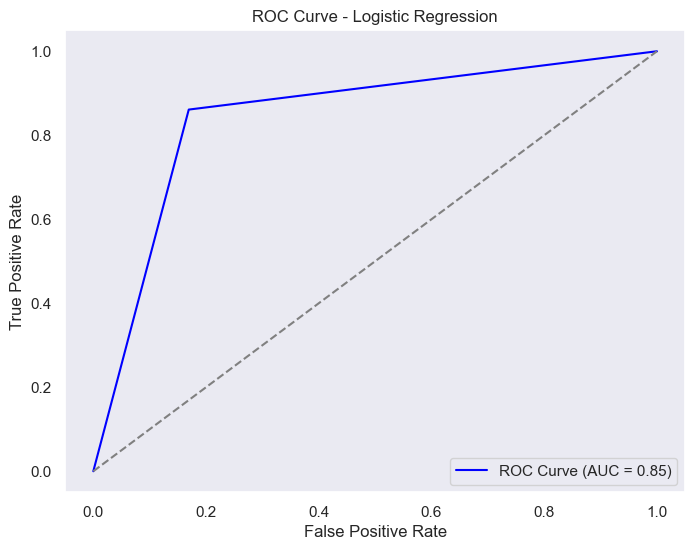

In [1064]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_logistic)
auc_score = roc_auc_score(y_test, y_pred_logistic)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {auc_score:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

ca sera modifier

#### ROC Curve Analysis - Logistic Regression

The ROC curve evaluates the performance of the logistic regression model for autism prediction:

- **AUC (Area Under the Curve):** The AUC is **0.85**, indicating that the model has good discriminatory power and can distinguish between the two classes (positive and negative) in **85% of cases**.
- **True Positive Rate (Sensitivity):** Reflects the model's ability to correctly identify positive cases.
- **False Positive Rate:** Shows the proportion of negative cases incorrectly classified as positive. Lower values are better.
- **Baseline Comparison:** The diagonal line represents random guessing (AUC = 0.5). The model's curve being well above this line confirms its effectiveness.
- **Threshold Balance:** Each point on the curve corresponds to a different threshold, balancing sensitivity and specificity.

**Conclusion:**  
The logistic regression model performs well for the autism prediction task, making it a reliable choice for this classification problem.


In [1065]:
best_classification_model = Classification_models[best_classification_model_name]
best_classification_model.fit(X_train_smote, y_train_smote)
y_pred_best_model = best_classification_model.predict(X_test)

# Compare Accuracy
if accuracy_score(y_test, y_pred_logistic) > accuracy_score(y_test, y_pred_best_model):
    print("\nLogistic Regression is the better model based on accuracy.")
else:
    print("\nBest Classification Model (Random Forest) is the better model based on accuracy.")


Logistic Regression is the better model based on accuracy.


###  **Unsupervised Learning Models**

### **ACP**

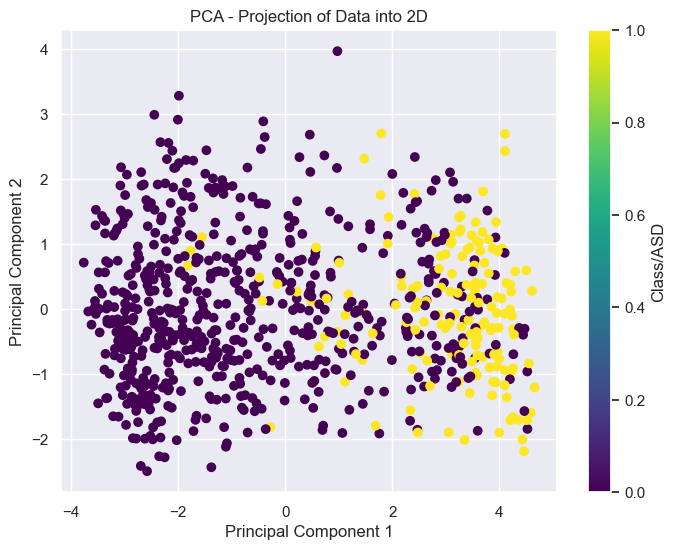

Variance explained by each principal component: [0.32460318 0.0630804 ]


In [1066]:
# Standardize the data (important before performing PCA)
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
x_pca = pca.fit_transform(x_scaled)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y, cmap='viridis')  # Color by 'Class/ASD'
plt.title('PCA - Projection of Data into 2D')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Class/ASD')
plt.show()

# Display the variance explained by each principal component
print(f'Variance explained by each principal component: {pca.explained_variance_ratio_}')

### K-means Clustering

**Elbow Method**

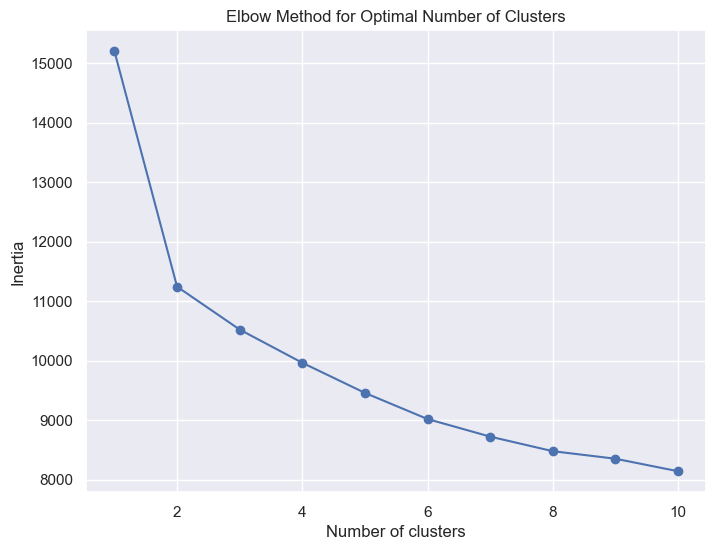

In [1067]:
# Calculate inertia for multiple numbers of clusters
inertia = []
for i in range(1, 11):  # Test for 1 to 10 clusters
    kmeans = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

**Silhouette**

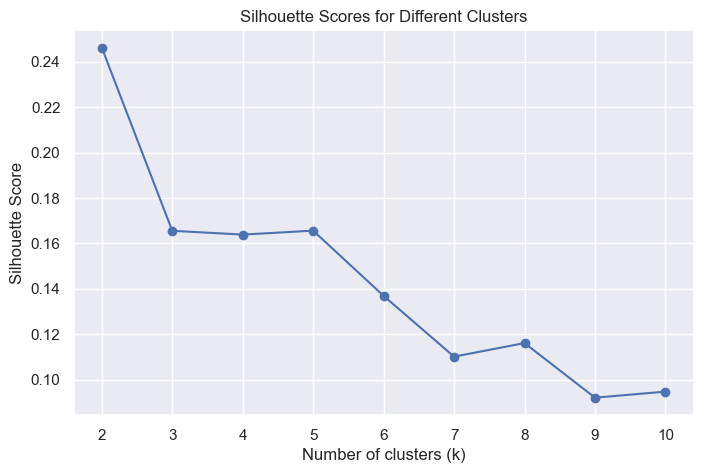

The optimal number of clusters is: 2


In [1068]:
# Replace 'Clus_dataSet' with your preprocessed dataset (e.g., X_scaled if you have already normalized your data)
Clus_dataSet = x_scaled  # X_scaled being the normalized data

silhouette_scores = []

# Test for different numbers of clusters
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(Clus_dataSet)
    labels = kmeans.labels_  # Get the cluster labels
    score = silhouette_score(Clus_dataSet, labels)  # Calculate the silhouette score
    silhouette_scores.append(score)

# Plot the silhouette scores for each number of clusters
plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Display the optimal number of clusters (the one with the highest silhouette score)
optimal_k = range(2, 11)[silhouette_scores.index(max(silhouette_scores))]
print(f"The optimal number of clusters is: {optimal_k}")

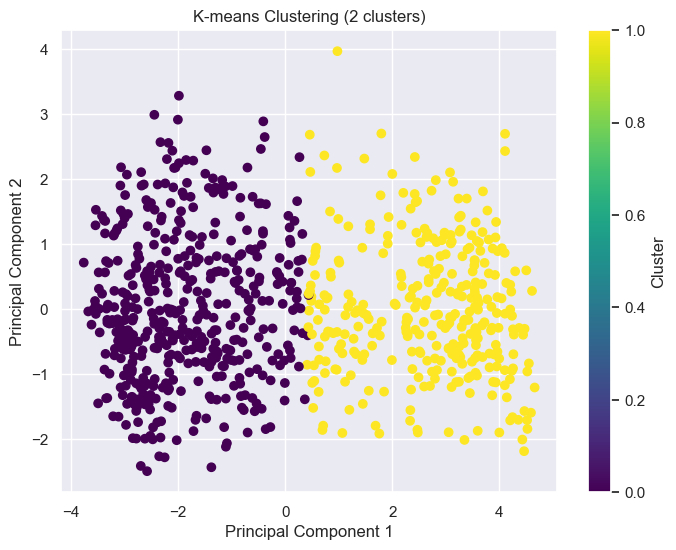

Centroids of the clusters:
[[-0.43805908 -0.49493424 -0.61371458 -0.61771482 -0.5642849  -0.55871906
  -0.58617255 -0.3367005  -0.58151844 -0.48693429 -0.06072971  0.06580641
  -0.42060814 -0.19018052 -0.37351337 -0.21793982 -0.0296654  -0.44389496
  -0.09741774]
 [ 0.62390233  0.70490634  0.87407834  0.87977566  0.80367849  0.79575139
   0.83485182  0.47954313  0.82822323  0.69351247  0.08649383 -0.09372428
   0.59904796  0.27086317  0.53197359  0.31039914  0.04225073  0.63221403
   0.13874648]]


In [1069]:
# Apply K-means on the standardized data (X_scaled)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=42)  
y_kmeans = kmeans.fit_predict(x_scaled)

# Visualize the clusters obtained with PCA
plt.figure(figsize=(8, 6))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.title('K-means Clustering (2 clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# Display the centroids of the clusters
print("Centroids of the clusters:")
print(kmeans.cluster_centers_)

## 6. Deployment
The best model was saved and prepared for deployment in real-world scenarios, where it can predict the likelihood that an individual is diagnosed with an autism spectrum disorder, based on the same behavioral and clinical features.

### Saving the Model

In [1070]:
with open('autism_model.pkl', 'wb') as file:
    pickle.dump(Classification_models["Random Forest"], file)

print("Random Forest model successfully saved in 'autism_model.pkl'")

Random Forest model successfully saved in 'autism_model.pkl'
